In [1]:
import os, sys
sys.path.append(os.path.dirname(os.getcwd()))
import pandas as pd

In [3]:
df = pd.read_csv('../data/classifier_data.csv')
df = df.drop('Unnamed: 0', axis=1)

df

,id,title,area,interpretability,doi,source,abstract,embedding
0,NaN,How Does Counterfactually Augmented Data Impac...,Computational Social Science and Cultural Anal...,False,10.18653/v1/2021.emnlp-main.28,EMNLP2021,As NLP models are increasingly deployed in soc...,[-7.19254375e-01 8.83557677e-01 -4.84047949e-...
1,NaN,Mining the Cause of Political Decision-Making ...,Computational Social Science and Cultural Anal...,False,10.18653/v1/2021.findings-emnlp.27,EMNLP2021,Mining the causes of political decision-making...,[-1.37615669e+00 7.75519371e-01 -2.43454051e+...
2,NaN,WHOSe Heritage: Classification of UNESCO World...,Computational Social Science and Cultural Anal...,False,10.18653/v1/2021.findings-emnlp.34,EMNLP2021,The UNESCO World Heritage List (WHL) includes ...,[-1.21913564e+00 -5.77203296e-02 -4.84362930e-...
3,NaN,To Protect and To Serve? Analyzing Entity-Cent...,Computational Social Science and Cultural Anal...,False,10.18653/v1/2021.findings-emnlp.82,EMNLP2021,Framing has significant but subtle effects on ...,[-3.17913592e-01 9.81432199e-01 -2.04092407e+...
4,NaN,An unsupervised framework for tracing textual ...,Computational Social Science and Cultural Anal...,False,10.18653/v1/2021.findings-emnlp.105,EMNLP2021,Morality plays an important role in social wel...,[-8.71621251e-01 1.30682871e-01 -8.50616574e-...
...,...,...,...,...,...,...,...,...
7861,T4773,Rank-Aware Negative Training for Semi-Supervis...,Machine Learning for NLP,False,10.1162/tacl_a_00574,ACL2023,Semi-supervised text classification-based para...,[-7.36485422e-01 -4.44146395e-01 -6.04271472e-...
7862,T4777,Transparency Helps Reveal When Language Models...,"Linguistic Theories, Cognitive Modeling, and P...",False,10.1162/tacl_a_00565,ACL2023,Many current NLP systems are built from langua...,[-2.99790144e-01 2.55220920e-01 -1.77838624e-...
7863,T4803,Design Choices for Crowdsourcing Implicit Disc...,Discourse and Pragmatics,False,10.1162/tacl_a_00586,ACL2023,Disagreement in natural language annotation ha...,[-7.91672230e-01 7.09851861e-01 -1.52864918e-...
7864,T4929,Time-and-Space-Efficient Weighted Deduction,"Semantics: Sentence-level Semantics, Textual I...",False,10.1162/tacl_a_00588,ACL2023,Many NLP algorithms have been described in ter...,[-1.27782851e-01 2.05834821e-01 -2.14885011e-...


In [11]:
df['embedding']

0       [-7.19254375e-01  8.83557677e-01 -4.84047949e-...
1       [-1.37615669e+00  7.75519371e-01 -2.43454051e+...
2       [-1.21913564e+00 -5.77203296e-02 -4.84362930e-...
3       [-3.17913592e-01  9.81432199e-01 -2.04092407e+...
4       [-8.71621251e-01  1.30682871e-01 -8.50616574e-...
                              ...                        
7861    [-7.36485422e-01 -4.44146395e-01 -6.04271472e-...
7862    [-2.99790144e-01  2.55220920e-01 -1.77838624e-...
7863    [-7.91672230e-01  7.09851861e-01 -1.52864918e-...
7864    [-1.27782851e-01  2.05834821e-01 -2.14885011e-...
7865    [-1.01624870e+00 -4.06648777e-02 -4.24135298e-...
Name: embedding, Length: 7866, dtype: object

In [116]:
import torch
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

SEED = 2024
SPLIT = 0.2

X = np.stack(df['embedding'].values)
X = torch.stack([torch.tensor(np.fromstring(x[1:-1], sep='\n'), dtype=torch.float32) for x in X])
y = df['interpretability'].values
y = torch.tensor([1 if label else 0 for label in y], dtype=torch.long)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=SPLIT, random_state=SEED)

BATCH_SIZE = len(X_train)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [117]:
import torch
import torch.nn as nn
import torch.optim as optim


class MLPClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLPClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes, bias=False)


    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = torch.softmax(out, dim=-1)
        return out


In [156]:
HIDDEN_SIZE = 100 
LR = 0.001
INPUT_SIZE = X_train.shape[1]

model = MLPClassifier(INPUT_SIZE, HIDDEN_SIZE, 2)
class_counts = [1000, 80]
weights = 1. / torch.tensor(class_counts, dtype=torch.float)
criterion = nn.CrossEntropyLoss(weight=weights)
optimizer = optim.Adam(model.parameters(), lr=LR)

In [166]:

EPOCHS = 20
for epoch in range(EPOCHS):
    model.train()
    for i, (inputs, labels) in enumerate(train_loader):
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    


Epoch [1/5], Loss: 0.4345
Epoch [2/5], Loss: 0.4338
Epoch [3/5], Loss: 0.4331
Epoch [4/5], Loss: 0.4328
Epoch [5/5], Loss: 0.4324
Epoch [6/5], Loss: 0.4318
Epoch [7/5], Loss: 0.4312
Epoch [8/5], Loss: 0.4308
Epoch [9/5], Loss: 0.4305
Epoch [10/5], Loss: 0.4300
Epoch [11/5], Loss: 0.4294
Epoch [12/5], Loss: 0.4289
Epoch [13/5], Loss: 0.4285
Epoch [14/5], Loss: 0.4282
Epoch [15/5], Loss: 0.4278
Epoch [16/5], Loss: 0.4273
Epoch [17/5], Loss: 0.4267
Epoch [18/5], Loss: 0.4262
Epoch [19/5], Loss: 0.4258
Epoch [20/5], Loss: 0.4253


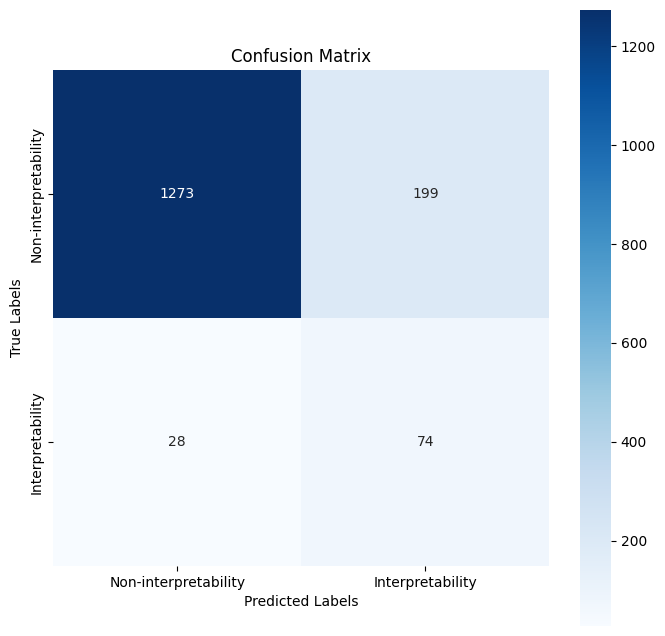

In [181]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

y_pred = []
y_true = []

model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.float(), labels.float()
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        
        y_pred.extend(predicted.numpy())
        y_true.extend(labels.numpy())

cm = confusion_matrix(y_true, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues', square=True)
labels = ['Non-interpretability', 'Interpretability']
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_title('Confusion Matrix')
plt.show()


In [175]:
df_filtered = df[df['interpretability'] == False]

for index, row in df_filtered.iterrows():
    embedding = torch.tensor(np.fromstring(row['embedding'][1:-1], sep='\n')).float()
    embedding = embedding.unsqueeze(0)

    model.eval()
    with torch.no_grad():
        output = model(embedding)
        prediction = torch.max(output, 1)[1].item()

    if prediction == 1:
        print(f"Model predicted 1 for index: {index}")
        print(row['abstract'])
        print(row['area'])


Model predicted 1 for index: 27
People use language in subtle and nuanced ways to convey their beliefs. For instance, saying claimed instead of said casts doubt on the truthfulness of the underlying proposition, thus representing the author’s opinion on the matter. Several works have identified such linguistic classes of words that occur frequently in natural language text and are bias-inducing by virtue of their framing effects. In this paper, we test whether generative language models (including GPT-2 (CITATION) are sensitive to these linguistic framing effects. In particular, we test whether prompts that contain linguistic markers of author bias (e.g., hedges, implicatives, subjective intensifiers, assertives) influence the distribution of the generated text. Although these framing effects are subtle and stylistic, we find evidence that they lead to measurable style and topic differences in the generated text, leading to language that is, on average, more polarised and more skewed t